### 4.1 CNN 원리

### 4.2.1 분류 CNN 모델링

In [6]:
import keras
from keras import models, layers

- Conv2D : 2차원 합성곱을 계산하는 클래스
- MaxPooling2D : 2차원 맥스풀링을 계산하는 클래스
- Flatten : 다차원의 입력을 1차원의 입력으로 변환하는 클래스

In [7]:
# 딥러닝 엔진 직접 제어 가능

from keras import backend

- 분류 CNN 모델링은 객체지향으로 구성 

In [10]:
class model(models.Sequential):
    def __init__(self, input_shape, num_classes):
        super().__init__()   # 기본 특성을 상속한 부모 함수를 부름 models.Sequential.__init__(self) 와 동일
      
    
        """
        입력 계층의 형태는 객체의 초기화 변수인 input_shape를 따름
        초기화 함수의 입력값이므로 모델의 인스턴스를 만들 때 정해집니다.
        합성곱 계층은 input_shape가 2차원 이미지들로 구성된다는 점, RGB로 여러 색상을 표현하기 때문에 input_shape의 길이가 3인 리스트
        """
        self.add(layers.Conv2D(
            32, kernel_size=(3,3),
            activation='relu',
            input_shape=input_shape))

        """
        특이 사항 : 커널 수 64개
        MaxPool2D : 합성곱을 한 뒤에 인접한 2 * 2 셀들을 묶어서 가장 큰 값만 내보내는 부속 계층
        dropout : 0.25
        Flatten : 입력을 벡터로 바꿉니다. 2차원 벡터를 1차원 벡터로 변환 시킵니다.
        """
        self.add(layers.Conv2D(64, (3,3), activation='relu'))
        self.add(layers.MaxPool2D(pool_size=(2,2)))
        self.add(layers.Dropout(0.25))
        self.add(layers.Flatten())


        self.add(layers.Dense(128, activation='relu'))
        self.add(layers.Dropout(0.5))
        self.add(layers.Dense(num_classes, activation='softmax'))


        self.compile(
            loss=keras.losses.categorical_crossentropy,
            optimizer=keras.optimizers.Adadelta(),
            metrics=['accuracy']
        )

### 4.2.2 분류 CNN을 위한 데이터 준비

- x_train, x_test : 학습 및 성능 평가에 사용할 필기체 이미지 변수들의 배열
- y_train, y_test : 학습과 성능 평가에 사용할 필기체 이미지의 레이블 정보의 배열

#### DNN과 CNN의 차이

1. 이미지를 벡터화 하지 않고 그대로 사용, 2차원 이미지를 1차원으로 변환하지 않음
2. 흑백 이미지의 채널 정보를 처리하려면 추가적인 차원을 이미지 데이터에 포함해야 합니다.
  - 컬러 이미지는 RGB색상을 다루는 채널정보가 이미지 데이터에 이미 포함되어 있어 이미지를 나타내는 각 입력 데이터가 3차원으로 구성
  - 흑백 이미지는 채널 정보가 존재하지 않아서 입력 데이터의 차원을 하나 더 추가해야 함.

In [11]:
from keras import datasets

In [12]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

11493376/11490434 [==============================] - 31s 3us/step


채널은 이미지 배열의 앞 단에 추가되어야 할 수도 있고, 뒷 단에 추가되어야 할 수도 있습니다.
- 케라스의 시스템 파라미터인 'image_data_format'으로 지정


```python3
x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
- 샘플 수, 채널 수, 이미지의 가로 길이, 이미지의 세로 길이로 구성
```

In [ ]:
if backend.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols) # 이미지 정보가 앞에 들어감
    
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1) # 이미지 정보가 끝에 들어감

### 4.2.3 학습 효과 분석

In [14]:
import matplotlib.pyplot as plt

%matplotlib inline

In [13]:
def plot_acc(history, title=None):
    # summarize history for accuracy
    if not isinstance(history, dict):
        history = history.history

    plt.plot(history['acc'])
    plt.plot(history['val_acc'])
    if title is not None:
        plt.title(title)
    plt.ylabel('Accracy')
    plt.xlabel('Epoch')
    plt.legend(['Training data', 'Validation data'], loc=0)
    # plt.show()


def plot_loss(history, title=None):
    # summarize history for loss
    if not isinstance(history, dict):
        history = history.history

    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    if title is not None:
        plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training data', 'Validation data'], loc=0)
    # plt.show()


### 4.2.4 분류 CNN 학습 및 성능 평가

In [17]:
import keras
import matplotlib.pyplot as plt
from keras import models, layers
from keras import backend
from keras import datasets

%matplotlib inline

In [23]:
# 분류 CNN 모델링

class CNN(models.Sequential):
    def __init__(self, input_shape, num_classes):
        super().__init__()

        self.add(layers.Conv2D(
            32, kernel_size=(3,3),
            activation='relu',
            input_shape=input_shape))

        self.add(layers.Conv2D(64, (3,3), activation='relu'))
        self.add(layers.MaxPool2D(pool_size=(2,2)))
        self.add(layers.Dropout(0.25))
        self.add(layers.Flatten())

        self.add(layers.Dense(128, activation='relu'))
        self.add(layers.Dropout(0.5))
        self.add(layers.Dense(num_classes, activation='softmax'))

        self.compile(
            loss=keras.losses.categorical_crossentropy,
            optimizer='rmsprop',
            metrics=['accuracy']
        )
        
# 분류 CNN을 위한 데이터 준비

class DATA():
    def __init__(self):
        num_classes = 10
        
        (x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
        
        img_rows, img_cols = x_train.shape[1:]
        
        
        if backend.image_data_format() == 'channels_first':
            x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
            x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
            input_shape = (1, img_rows, img_cols) # 이미지 정보가 앞에 들어감
    
        else:
            x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
            x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
            input_shape = (img_rows, img_cols, 1) # 이미지 정보가 끝에 들어감
            
        x_train = x_train.astype('float32')
        x_test = x_test.astype('float32')
        
        x_train /= 255
        x_test /= 255
        
        """
        to_categorical
            keras.utils.to_categorical(y, num_classes=None, dtype='float32')
            Converts a class vector (integers) to binary class matrix.

            E.g. for use with categorical_crossentropy.

            Arguments

            y: class vector to be converted into a matrix (integers from 0 to num_classes).
            num_classes: total number of classes.
            dtype: The data type expected by the input, as a string (float32, float64, int32...)
            Returns

            A binary matrix representation of the input. The classes axis is placed last.
        """
        
        y_train = keras.utils.to_categorical(y_train, num_classes)
        y_test = keras.utils.to_categorical(y_test, num_classes)
        
        self.input_shape = input_shape
        self.num_classes = num_classes
        self.x_train, self.y_train = x_train, y_train
        self.x_test, self.y_test = x_test, y_test

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 71s 1ms/step - loss: 0.1894 - acc: 0.9442 - val_loss: 0.0710 - val_acc: 0.9784
Epoch 2/10
48000/48000 [==============================] - 71s 1ms/step - loss: 0.0956 - acc: 0.9732 - val_loss: 0.0683 - val_acc: 0.9804
Epoch 3/10
48000/48000 [==============================] - 70s 1ms/step - loss: 0.0927 - acc: 0.9742 - val_loss: 0.0592 - val_acc: 0.9838
Epoch 4/10
48000/48000 [==============================] - 71s 1ms/step - loss: 0.0961 - acc: 0.9736 - val_loss: 0.0602 - val_acc: 0.9828
Epoch 5/10
48000/48000 [==============================] - 73s 2ms/step - loss: 0.1039 - acc: 0.9724 - val_loss: 0.0602 - val_acc: 0.9842
Epoch 6/10
48000/48000 [==============================] - 73s 2ms/step - loss: 0.1073 - acc: 0.9709 - val_loss: 0.0660 - val_acc: 0.9832
Epoch 7/10
48000/48000 [==============================] - 73s 2ms/step - loss: 0.1114 - acc: 0.9711 - val_loss: 0.0664 - val_acc

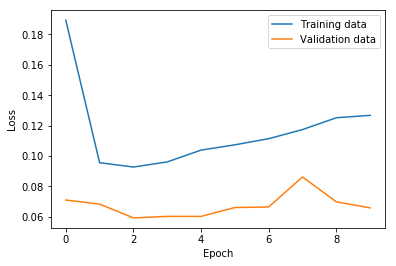

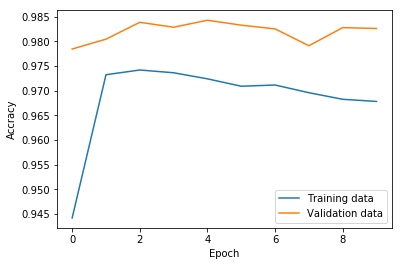

In [25]:
# 분류 CNN 학습 및 성능 평가

def main():
    batch_size = 20
    epochs = 10
    
    data = DATA()
    model = CNN(data.input_shape, data.num_classes)
    
    history = model.fit(
        data.x_train,
        data.y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_split=0.2
    )
    
    score = model.evaluate(data.x_test, data.y_test)
    print()
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])

    plot_loss(history)
    plt.show()
    plot_acc(history)
    plt.show()
    

if __name__ == '__main__':
    main()

---------------------

### 4.3 분류 CNN 학습 및 성능 평가

1. 분류 CNN 패키지 임포트
2. 분류 CNN 모델링
3. 분류 CNN을 위한 데이터 준비
4. 분류 CNN의 학습 및 성능 평가를 위한 머신 클래스
5. 분류 CNN의 수행

### 4.3.1 분류 CNN 패키지 임포트

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn import model_selection, metrics
from sklearn.preprocessing import MinMaxScaler
from keras import backend as K
from keras.utils import np_utils
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from kerasapp import skeras # 학습 곡선을 그리는 plot_loss(), plot_acc()를 모아 둔 파일
from kerasapp import sfile # 학습 결과 저장하는 함수

### 4.3.2 분류 CNN 모델링


#### LeNet
- LeNet 신경망은 레콘 교수 팀에서 만든 합성곱 방식 인공신경망
- 합성곱 계층 두 개와 완전 연결 계층 하나로 구성

In [31]:
# CNN은 모델의 일종이므로 케라스의 Model 클래스를 상속해서 만들었음

class CNN(Model):
    def __init__(model, nb_classes, in_shape=None):
        model.nb_classes = nb_classes
        model.in_shape = in_shape
        model.build_model() # 모델 만들기
        super().__init__(model.x, model.y)
        model.compile()
        
    def build_model(model):
        nb_classes = model.nb_classes
        in_shape = model.in_shape
        
        
        """
        주어진 입력 이미지으 ㅣ크기를 처리하는 입력 계층을 정의
        그 다음은 완전 연결 계층으로 구성된 은닉 계층 두 개를 정의
        두 은닉 계층 모두 (3, 3) 크기로 구성된 합성곱 필터를 사용
        """
        x = Input(in_shape)
        h = Conv2D(
            32, 
            kernel_size=(3, 3), 
            activation='relu',
            input_shape=in_shape)(x)
        
        h = Conv2D(
            64,
            (3, 3),
            activation='relu')(h)
        
        """
        합성곱 계층의 처리 결과를 완전 연결 계층으로 보내기 위해 3차원 텐서를 1차원 벡터로 바꾸는 Flatten 작업
        맥스풀링 작업이 마치고 나면 입력 크기가 가로 세로 두 축으로 각각 반씩 줄어듭니다.
        여기까지 작업 한 것이 합성곱 계층의 출력임을 변수 z_c1을 사용해서 저장
        이렇게 해두면 x와 z_c1 사이의 모델을 만들면 추후 합성곱 계층을 지난 결과를 별도로 분석 할 수 있음
        """
        h = MaxPooling2D(pool_size=(2,2))(h)
        h = Dropout(0.25)(h)
        h = Flatten()(h)
        z_c1 = h
        
        """
        완전 연결 계층은 128개 노드로 구성되었으며, Relu를 활성화 함수로 사용
        출력 계층으로 나가기 전의 완전 연결 계층 출력도 별도로 저장, z_f1 = h
        """
        h = Dense(128, activation='relu')(h)
        h = Dropout(0.5)(h)
        z_f1 = h
        
        """
        출력 계층을 nb_classes에 해당하는 만큼의 노드 수로 구성, 활성화 함수 소프트맥스로 지정
        z_c1, z_f1을 이용해 부가적인 2가지 모델 생성
        또한 본 모델을 만들 수 있도록 입력과 출력을 멤버 변수로 정의
        """
        y = Dense(nb_classes, activation='softmax', name='preds')(h)
        
        model.c1_part = Model(x, z_c1)
        model.f1_part = Model(x, z_f1)
        
        model.x, model.y = x, y
        
    def compile(model):
        Model.compile(
            model,
            loss='categorical_crossentropy',
            optimizer='adadelta',
            metrics=['accuracy']
        )

### 4.3.3 분류 CNN을 위한 데이터 준비

In [42]:
class Dataset():
    def __init__(self, X, y, nb_classes, scaling=True, test_size=0.2, random_state=0):
        """
        X is originally vector. Hence, it will be transformed to 2D images with a channel.
        """
        
        self.X = X
        self.add_channels()
        
        
        X = self.X
        # the data, shuffled and split between train and test sets
        
        X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=random_state)
        
        print(X_train.shape, y_train.shape)
        
        X_train = X_train.astype('float32')
        X_test = X_test.astype('float32')
        
        if scaling:
            # scaling to have (0, 1) for each feature(each pixel)
            
            scaler = MinMaxScaler()
            n = X_train.shape[0]
            
            X_train = scaler.fit_transform(
                X_train.reshape(n, -1)).reshape(X_train.shape)
            
            n = X_test.shape[0]
            X_test = scaler.transform(
                X_test.reshape(n, -1)).reshape(X_test.shape)
            
            self.scaler = scaler
            
        print('X_train shape:', X_train.shape)
        print(X_train.shape[0], 'train samples')
        print(X_test.shape[0], 'test samples')
        
        # convert class vectors to binary class matrices
        
        Y_train = np_utils.to_categorical(y_train, nb_classes)
        Y_test = np_utils.to_categorical(y_test, nb_classes)
        
        self.X_train, self.X_test = X_train, X_test
        self.Y_train, self.Y_test = Y_train, Y_test
        self.y_train, self.y_test = y_train, y_test
        
    def add_channels(self):
        X = self.X
        
        if len(X.shape) == 3:
            N, img_rows, img_cols = X.shape
            
            if K.image_dim_ordering == 'th':
                X = X.reshape(X.shape[0], 1, img_rows, img_cols)
                input_shape = (1, img_rows, img_cols)
            else:
                X = X.reshape(X.shape[0], img_rows, img_cols, 1)
                input_shape = (img_rows, img_cols, 1)
        else:
            input_shape = X.shape[1:] # channel is already included
            
        self.X = X
        self.input_shape = input_shape